# Additional Statistical Test

This notebook contains some additional information about performing some common statistical tests using the [Scipy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module.  



## Load the Data

The data we are using is provided by the authors of Data Wrangling with Python [\*] It is [UNICEF data](https://github.com/jackiekazil/data-wrangling/tree/master/data/unicef) published from their corpus on child labor. UNICEF has significant data sets on women and children.  This is data from Zimbabwe’s latest Multiple Indicator Cluster Survey.  This is data from survey participants that identify as men.

[\*] Jacqueline Kazil and Katharine Jarmul. 2016. Data Wrangling with Python: Tips and Tools to Make Your Life Easier (1st. ed.). O'Reilly Media, Inc.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats  ## THIS ONE IS NEW!! SCIPY, NUMPY's scientific analysis cousin

In [2]:
df_mn = pd.read_csv('files/mn-combined.csv', low_memory=False)
df_mn

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MWAGE,MWDOM,MWAGEM,MWDOBLC,MMSTATUS,MCEB,MCSURV,MCDEAD,wscore,windex5
0,0,1,17,1,1,17,1,14,7,4,...,25-29,1365.0,29.0,NaN,Currently married/in union,0.0,0.0,0.0,1.603670,5
1,1,1,20,1,1,20,1,14,7,4,...,35-39,1370.0,37.0,NaN,Currently married/in union,0.0,0.0,0.0,1.543277,5
2,2,2,1,1,2,1,1,9,8,4,...,40-44,1100.0,18.0,NaN,Currently married/in union,3.0,3.0,0.0,0.878635,4
3,3,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
4,4,2,1,8,2,1,8,9,8,4,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.878635,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,9003,682,20,2,682,20,2,913,11,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4
9004,9004,682,20,3,682,20,3,918,10,3,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4
9005,9005,682,21,2,682,21,2,913,13,3,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.712168,4
9006,9006,682,23,1,682,23,1,913,9,3,...,25-29,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.847591,4


The column names are useless.  The data curator did this keep them easy to use in code.  This resulted in the obscure names.  A translation between cryptic column name and a description is provided in `files/mn_headers_updated.csv`.



## Confidence Intervals

Let's go over some basic statistical analysis vocabulary. 

**Point Estimates** 
- Estimate the value of a variable for a population based on an inference about that population
- Example we’ll use: estimate the number of children a person has based on the average number of children in the population
- Based on a sample, estimates likely to vary

**Estimation as an interval**
- Confidence Interval: A range of values such that for the desired level there is confidence in the true value falling within
- Confidence Level: Probability of the true value being included in the interval
- Confidence Limits: Extremes of the confidence interval, the end points

Here is a picture that illustrates the above concepts:

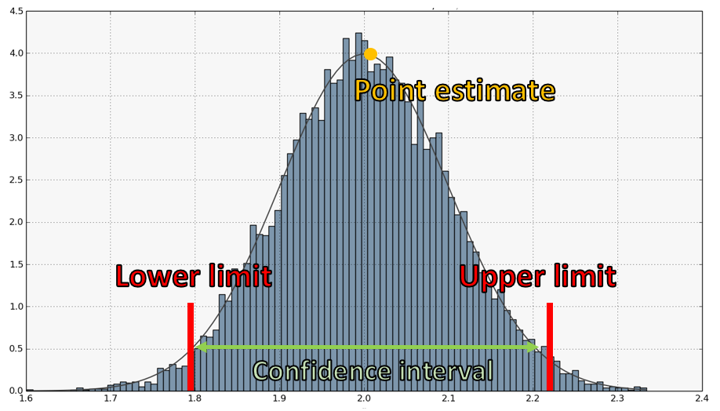

*Source: [Wikipedia](https://en.wikipedia.org/wiki/Point_estimation)*

### Central Limit Theorem

Let's nerd out for a moment and talk about some statistical theory...

"In probability theory, the central limit theorem establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed." [From Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)


## Student's T-test

T-tests are common in Hypothesis Testing & Inferential Statistics

"The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known." [From Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)

It has wicked cool origins.  Invented by chemist Willam Gosset in Dublin (while working at Guinness brewery).

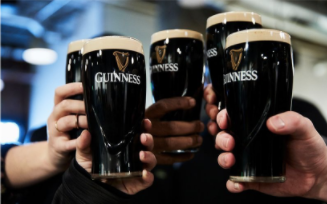

**Types of Student t:**
- Single sample t
    - One sample, compared with known population mean
    - Answers: Is our sample different from population?

- Independent Samples t
    - Different (independent) samples of participants experience each level of IV
    - Are our samples from different populations?

- Paired/Dependent Samples
    - Same or related (dependent) samples of participants experience each level of IV
    - Are our samples from different populations?

**What is this null hypothesis thing?**

*The hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error.*

When we "reject the null hypothesis" we are saying the differences are NOT due to chance and that there is statistical significance between populations.

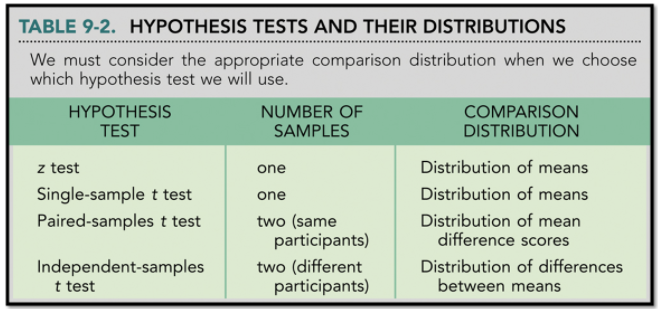

Let's go back and look at the UNICEF DataFrame, particularly the column `MMSTATUS` which is a column that describes marital status.

In [3]:
# look at the ma
df_mn['MMSTATUS']

0       Currently married/in union
1       Currently married/in union
2       Currently married/in union
3                              NaN
4           Never married/in union
                   ...            
9003        Never married/in union
9004        Never married/in union
9005        Never married/in union
9006        Never married/in union
9007                           NaN
Name: MMSTATUS, Length: 9008, dtype: object

In [4]:
# calculate the counts of the different values for this column
df_mn['MMSTATUS'].value_counts()

Currently married/in union    4246
Never married/in union        3285
Formerly married/in union      383
Name: MMSTATUS, dtype: int64

For this to work right, we need to make the type of date in the column categorical data:

In [5]:
# convert MMSTATUS from a string to a category
df_mn['MMSTATUS'] = df_mn['MMSTATUS'].astype('category')

Let's look at another column, `MTA16`, which contains data for number of days when at least one drink of alcohol was used in the past month.

In [6]:
df_mn['MTA16'].describe()

count    4441.000000
mean        4.540419
std         8.814645
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        99.000000
Name: MTA16, dtype: float64

We can plot this information to visualize the distribution.

<AxesSubplot:ylabel='Frequency'>

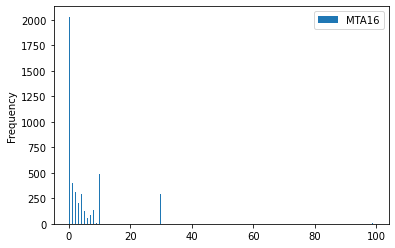

In [7]:
df_mn[['MTA16']].plot(bins=300, kind="hist")

<AxesSubplot:>

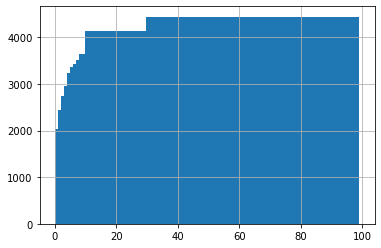

In [8]:
df_mn['MTA16'].hist(bins=300, cumulative=True)

Let's create two new DataFrames, one that contains survey respondents that are currently married and another the represents those respondents that have never been married.

In [9]:
married_group = df_mn[df_mn['MMSTATUS'] == 'Currently married/in union']
never_group = df_mn[df_mn['MMSTATUS'] == 'Never married/in union']

In [10]:
married_group

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MWAGE,MWDOM,MWAGEM,MWDOBLC,MMSTATUS,MCEB,MCSURV,MCDEAD,wscore,windex5
0,0,1,17,1,1,17,1,14,7,4,...,25-29,1365.0,29.0,NaN,Currently married/in union,0.0,0.0,0.0,1.603670,5
1,1,1,20,1,1,20,1,14,7,4,...,35-39,1370.0,37.0,NaN,Currently married/in union,0.0,0.0,0.0,1.543277,5
2,2,2,1,1,2,1,1,9,8,4,...,40-44,1100.0,18.0,NaN,Currently married/in union,3.0,3.0,0.0,0.878635,4
6,6,2,7,1,2,7,1,9,12,4,...,25-29,1333.0,23.0,NaN,Currently married/in union,1.0,1.0,0.0,0.594823,4
8,8,2,11,1,2,11,1,12,7,4,...,30-34,1309.0,26.0,NaN,Currently married/in union,1.0,1.0,0.0,0.541830,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,8993,682,3,1,682,3,1,918,16,3,...,50-54,1018.0,22.0,NaN,Currently married/in union,7.0,7.0,0.0,0.917077,4
8996,8996,682,5,1,682,5,1,922,9,3,...,35-39,1174.0,22.0,NaN,Currently married/in union,4.0,4.0,0.0,1.071216,5
8997,8997,682,8,1,682,8,1,922,10,3,...,50-54,1057.0,24.0,NaN,Currently married/in union,3.0,2.0,1.0,0.839500,4
8999,8999,682,12,1,682,12,1,918,9,3,...,20-24,1352.0,22.0,NaN,Currently married/in union,2.0,2.0,0.0,0.648918,4


As we did above, let's remove respondents for which `MTA16` is zero.

In [11]:
married_group_nonZ = married_group[married_group['MTA16'] > 0]
married_group_nonZ

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MWAGE,MWDOM,MWAGEM,MWDOBLC,MMSTATUS,MCEB,MCSURV,MCDEAD,wscore,windex5
2,2,2,1,1,2,1,1,9,8,4,...,40-44,1100.0,18.0,NaN,Currently married/in union,3.0,3.0,0.0,0.878635,4
8,8,2,11,1,2,11,1,12,7,4,...,30-34,1309.0,26.0,NaN,Currently married/in union,1.0,1.0,0.0,0.541830,4
14,14,2,19,1,2,19,1,10,13,4,...,50-54,1082.0,28.0,NaN,Currently married/in union,3.0,3.0,0.0,1.505256,5
17,17,2,25,1,2,25,1,8,7,4,...,40-44,1208.0,28.0,NaN,Currently married/in union,3.0,3.0,0.0,1.275285,5
21,21,3,7,1,3,7,1,11,13,4,...,35-39,1241.0,24.0,NaN,Currently married/in union,3.0,3.0,0.0,0.983575,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978,8978,681,5,1,681,5,1,913,16,3,...,25-29,1370.0,29.0,NaN,Currently married/in union,0.0,0.0,0.0,0.701278,4
8980,8980,681,8,1,681,8,1,913,14,3,...,20-24,1280.0,17.0,NaN,Currently married/in union,2.0,2.0,0.0,1.165691,5
8993,8993,682,3,1,682,3,1,918,16,3,...,50-54,1018.0,22.0,NaN,Currently married/in union,7.0,7.0,0.0,0.917077,4
8997,8997,682,8,1,682,8,1,922,10,3,...,50-54,1057.0,24.0,NaN,Currently married/in union,3.0,2.0,1.0,0.839500,4


In [12]:
never_group_nonZ = never_group[never_group['MTA16'] > 0]
never_group_nonZ

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MWAGE,MWDOM,MWAGEM,MWDOBLC,MMSTATUS,MCEB,MCSURV,MCDEAD,wscore,windex5
4,4,2,1,8,2,1,8,9,8,4,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.878635,4
11,11,2,14,3,2,14,3,12,15,4,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,1.535549,5
20,20,3,6,1,3,6,1,7,14,4,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.926326,4
26,26,3,13,3,3,13,3,5,14,4,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,1.588000,5
38,38,4,6,5,4,6,5,12,11,4,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,1.271425,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8853,8853,672,14,1,672,14,1,915,23,3,...,30-34,NaN,NaN,NaN,Never married/in union,1.0,1.0,0.0,1.002036,4
8871,8871,674,3,2,674,3,2,914,19,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.966824,4
8879,8879,674,14,5,674,14,5,920,20,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,1.064585,5
8981,8981,681,8,2,681,8,2,913,11,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,1.165691,5


Let's look at the means for these two groups.

In [13]:
married_group_nonZ['MTA16'].mean()

8.694360218314129

In [14]:
never_group_nonZ['MTA16'].mean()

6.894830659536542

Now we can perform a t-test to determine if the mean values between these two distributions are statistically significant. That is, can we be sure the difference cannot be attributed to chance.

In [15]:
stats.ttest_ind(married_group_nonZ['MTA16'], never_group_nonZ['MTA16'],equal_var=False)

Ttest_indResult(statistic=3.723602217095181, pvalue=0.00020640511963531413)

The T test results in a T-Score that is 3.7. This is a pretty large value so these groups are statistically different and that different is not simply chance.

Let's look at some other columns and do another t-test.  We'll use `MWB4`, highest level of school attended, and `MTA2`, age when cigarette was first smoked for the first time.

In [16]:
df_mn['MWB4'].unique()

array(['Higher', 'Primary', nan, 'Secondary', 'Preschool'], dtype=object)

In [17]:
df_mn['MTA2'].describe()

count    3121.000000
mean       19.081705
std         8.841412
min         0.000000
25%        17.000000
50%        19.000000
75%        23.000000
max        99.000000
Name: MTA2, dtype: float64

Yikes, we've got some outliers... let's use our Z-score kung-fu to remove these outliers with statistical conviction!

In [18]:
mta2_zscore = stats.zscore(df_mn['MTA2'].dropna())
mta2_zscore

2      -0.122365
6       0.217002
7      -0.348609
8       0.669491
10      0.217002
          ...   
8994   -2.158565
8997    0.782613
9002   -0.122365
9003   -0.574854
9006   -2.158565
Name: MTA2, Length: 3121, dtype: float64

In [19]:
mta2_zscore_abs = np.abs(mta2_zscore)
mta2_zscore_abs

2       0.122365
6       0.217002
7       0.348609
8       0.669491
10      0.217002
          ...   
8994    2.158565
8997    0.782613
9002    0.122365
9003    0.574854
9006    2.158565
Name: MTA2, Length: 3121, dtype: float64

In [20]:
filter_mta2 = (mta2_zscore_abs < 3)
filter_mta2

2       True
6       True
7       True
8       True
10      True
        ... 
8994    True
8997    True
9002    True
9003    True
9006    True
Name: MTA2, Length: 3121, dtype: bool

In [21]:
new_df = df_mn.dropna(subset=['MTA2'])
new_df = new_df[filter_mta2]
new_df

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MWAGE,MWDOM,MWAGEM,MWDOBLC,MMSTATUS,MCEB,MCSURV,MCDEAD,wscore,windex5
2,2,2,1,1,2,1,1,9,8,4,...,40-44,1100.0,18.0,NaN,Currently married/in union,3.0,3.0,0.0,0.878635,4
6,6,2,7,1,2,7,1,9,12,4,...,25-29,1333.0,23.0,NaN,Currently married/in union,1.0,1.0,0.0,0.594823,4
7,7,2,10,1,2,10,1,6,12,4,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,1.324645,5
8,8,2,11,1,2,11,1,12,7,4,...,30-34,1309.0,26.0,NaN,Currently married/in union,1.0,1.0,0.0,0.541830,4
10,10,2,14,2,2,14,2,12,13,4,...,35-39,1279.0,28.0,NaN,Formerly married/in union,2.0,2.0,0.0,1.535549,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8994,682,3,3,682,3,3,918,16,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.917077,4
8997,8997,682,8,1,682,8,1,922,10,3,...,50-54,1057.0,24.0,NaN,Currently married/in union,3.0,2.0,1.0,0.839500,4
9002,9002,682,20,1,682,20,1,918,10,3,...,25-29,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4
9003,9003,682,20,2,682,20,2,913,11,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4


Let's use the DataFrame `map()` function to create cleaner columns and also collapse some education categories.

In [22]:
mapping = {'Higher': 'HSH', 'Secondary': 'HSH', 'Preschool': 'NHS', 'Primary': 'NHS'}
new_df['MWB4-2'] = new_df['MWB4'].map(mapping)
new_df['MWB4-2'].unique()

array(['NHS', 'HSH', nan], dtype=object)

In [23]:
new_df['MWB4-2'].describe()

count     3061
unique       2
top        HSH
freq      2177
Name: MWB4-2, dtype: object

As before, let's separate out data in to two DataFrames for each grouping.

In [24]:
MWB4_hsh = new_df[new_df['MWB4-2'] == 'HSH']
MWB4_hsh['MWB4-2'].describe()

count     2177
unique       1
top        HSH
freq      2177
Name: MWB4-2, dtype: object

In [25]:
MWB4_nhs = new_df[new_df['MWB4-2'] == 'NHS']
MWB4_nhs['MWB4-2'].describe()

count     884
unique      1
top       NHS
freq      884
Name: MWB4-2, dtype: object

OK, now we can look at the means of these two DataFrames

In [26]:
MWB4_hsh['MTA2'].mean()

18.71290767110703

In [27]:
MWB4_nhs['MTA2'].mean()

18.894796380090497

And, finally, the t-test to see if these populations are different.

In [28]:
stats.ttest_ind(MWB4_hsh['MTA2'], MWB4_nhs['MTA2'],equal_var=False)

Ttest_indResult(statistic=-0.6345735013685562, pvalue=0.5257857467564309)

Our T-Score is -0.63, pretty close to zero. This means there is no statistical difference in age first to smoke a cigarette when compared across education level.  The differences in mean values is just chance.

## Chi-Squared

Chi-squared allow the classification on one nominal variable to be compared to the classification on a second nominal variable. Example: Are urban American voters more likely to vote democratic than rural American voters?

Statistical focus is on the number of people in the sample classified in patterned ways on two variables. Why? Mean and standard deviations do not make sense for nominal variables.

What is exactly is the statistical test here? Determine whether the pattern or frequencies in the cross classification could have occurred by chance, or whether there is systematic assignment.

Let's go do some more interrogation of this DataFrame.  This time, let's look at `MTA1`, whether a the survey respondent has ever tried smoking -- a categorical representation of the data.

In [29]:
df_mn['MTA1']

0        No
1        No
2       Yes
3       NaN
4        No
       ... 
9003    Yes
9004     No
9005     No
9006    Yes
9007    NaN
Name: MTA1, Length: 9008, dtype: object

Fit, fit, fitness!  Get it ready!

In [30]:
df_mn['MTA1'] = df_mn['MTA1'].astype('category')
df_mn['MWAGE'] = df_mn['MWAGE'].astype('category')
df_mn.dropna(subset=['MWAGE', 'MTA1'], inplace=True)
df_mn_new = df_mn[df_mn['MTA1'] != 'Missing']
df_mn_new

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MWAGE,MWDOM,MWAGEM,MWDOBLC,MMSTATUS,MCEB,MCSURV,MCDEAD,wscore,windex5
0,0,1,17,1,1,17,1,14,7,4,...,25-29,1365.0,29.0,NaN,Currently married/in union,0.0,0.0,0.0,1.603670,5
1,1,1,20,1,1,20,1,14,7,4,...,35-39,1370.0,37.0,NaN,Currently married/in union,0.0,0.0,0.0,1.543277,5
2,2,2,1,1,2,1,1,9,8,4,...,40-44,1100.0,18.0,NaN,Currently married/in union,3.0,3.0,0.0,0.878635,4
4,4,2,1,8,2,1,8,9,8,4,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.878635,4
6,6,2,7,1,2,7,1,9,12,4,...,25-29,1333.0,23.0,NaN,Currently married/in union,1.0,1.0,0.0,0.594823,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9002,9002,682,20,1,682,20,1,918,10,3,...,25-29,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4
9003,9003,682,20,2,682,20,2,913,11,3,...,20-24,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4
9004,9004,682,20,3,682,20,3,918,10,3,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.641895,4
9005,9005,682,21,2,682,21,2,913,13,3,...,15-19,NaN,NaN,NaN,Never married/in union,0.0,0.0,0.0,0.712168,4


We can create a table, called a *crosstab* of two categorical data types.  We will then use this *crosstab* as input into the chi-squared test.

In [31]:
crosstab = pd.crosstab(df_mn['MWAGE'], df_mn['MTA1'])
crosstab

MTA1,Missing,No,Yes
MWAGE,,,
15-19,0,1784,241
20-24,0,762,475
25-29,0,564,550
30-34,0,486,610
35-39,1,477,444
40-44,0,403,342
45-49,0,210,217
50-54,0,106,242


In [32]:
stats.chi2_contingency(crosstab)

(1015.7263542953267,
 6.60881427664554e-208,
 14,
 array([[2.55875663e-01, 1.22615618e+03, 7.98587945e+02],
        [1.56305282e-01, 7.49014910e+02, 4.87828784e+02],
        [1.40763204e-01, 6.74537276e+02, 4.39321961e+02],
        [1.38488754e-01, 6.63638110e+02, 4.32223402e+02],
        [1.16502401e-01, 5.58279505e+02, 3.63603993e+02],
        [9.41369725e-02, 4.51104372e+02, 2.93801491e+02],
        [5.39550164e-02, 2.58552439e+02, 1.68393606e+02],
        [4.39727066e-02, 2.10717210e+02, 1.37238817e+02]]))

The above output needs to be parsed.  We want to look at the first three outputs, which are:
- chi2float, The test statistic
- pfloat, The p-value of the test
- dofint, Degrees of freedom

From this output we can see that indeed age has a statistically significant influence on whether a survey respondent has tried smoking.

If we go back to the *crosstab*, we can pull out the pieces to look at the categorical probabilities:

In [33]:
crosstab

MTA1,Missing,No,Yes
MWAGE,,,
15-19,0,1784,241
20-24,0,762,475
25-29,0,564,550
30-34,0,486,610
35-39,1,477,444
40-44,0,403,342
45-49,0,210,217
50-54,0,106,242


In [34]:
crosstab['Yes'] / (crosstab['No'] + crosstab['Yes'])

MWAGE
15-19    0.119012
20-24    0.383994
25-29    0.493716
30-34    0.556569
35-39    0.482085
40-44    0.459060
45-49    0.508197
50-54    0.695402
dtype: float64